# Predikce známky z kurzů matematiky a portugalištiny

Autoři: Eva-Marie Lacinová, Jiří Čech

Predikce finální známky z kurzů matematiky a portugalištiny na základě rodinného zázemí a konzumace alkoholu. Dataset obsahuje 33 atributů a je dostupný z https://www.kaggle.com/uciml/student-alcohol-consumption

## README
Je nutné spustit všechny bloky. Záložka `Cell->Run All`.

Spuštění ověřeno u:
- Distribuce `Anaconda 2020.07`
- `Python 3.8.6` s aktuálními packages

Proměnná `data` obsahuje veškerá data včetně odvozených sloupců.

Z této promměnné byly vytvořeny subsety:

- `data_math` obsahuje všechny studenty matematiky
- `data_portuguese` obsahuje všechny studenty portugalštiny
- `data_both` obsahuje všechny studenty, kteří mají oba předměty
- `data_math_only` obsahuje všechny studenty, kteří mají pouze matematiku
- `data_portugues_only` obsahuje všechny studenty, kteří mají pouze portugalštinu

Proměnná `data_processed` obsahuje veškerá data upravená do strojově čitelných hodnot.

Proměnná `data_model` obsahují data pro konkrétní úlohy v této práci.

## Popis dat

Data byla získána v rámci průzkumu mezi studenty matematiky a portugalštiny na dvou středních školách v Portugalsku. Obsahují celou řadu zajímavých informací o socioekonomickém zázemí studentů a o jejich známkách v průběhu semestru.

### Atributy

Atributy pro oba datasey – `student-mat.csv` (kurz matematiky) a `student-por.csv` (kurz portugalštiny) jsou následující:

- `school` - škola, kterou student navštěvuje (binární: `GP` - Gabriel Pereira nebo `MS` - Mousinho da Silveira)
- `sex` - pohlaví studenta (binární: `F` - žena nebo `M` - muž)
- `age` - věk studenta (nuumerický: from 15 to 22)
- `address` - typ adresy (binární: `U` - město or `R` - vesnice)
- `famsize` - velikost rodiny (binární: `LE3` - méně nebo rovno 3 or `GT3` - více než 3)
- `Pstatus` - soužití rodičů (binární: `T` - žijící spolu or `A` - nežíjící spolu)
- `Medu` - vzdělání matky (numerický: 0 - žádné, 1 - základní škola, 2 – 5th střední škola, 3 – bakalářský titul 4 – magisterský titul)
- `Fedu` - vzdělání otce (numerický: 0 - žádné, 1 - základní škola, 2 – 5th střední škola, 3 – bakalářský titul 4 – magisterský titul)
- `Mjob` - povolání matky (nominální: `teacher` učitel, `health` zdravotní péče, `services` státní správa, `at_home` v domácnosti nebo `other`další)
- `Fjob` - povolání otce (nominální: `teacher` učitel, `health` zdravotní péče, `services` státní správa, `at_home` v domácnosti nebo `other`další)
- `reason` - důvod pro výběr školy (nominální: blízko domova `home`, pověst školy `reputation`, kvalitní kurzy `course`  or jiné `other`)
- `guardian` - studentův opatrovník (nominální: `mother` matka, `father` otec or `other` jiný)
- `traveltime` - doba cesty do školy z domova (numerický: 1 - 1 hodin)
- `studytime` - čas věnovaný domácímu studiu týdně (numerický: 1 - 10 hodin)
- `failures` - počet neúspěšných pokusů zakončení kurzu (numerický: n pokud 1<=n<3, jinak 4)
- `schoolsup` - extra podpora vzdělávání ve škole (binární: ano nebo ne)
- `famsup` - extra podpora vzdělávání doma (binární: ano nebo ne)
- `paid` - hodiny navíc v rámci školních kurzů (binární: ano nebo ne)
- `activities` - aktivity nad rámec školních osnov (binární: ano nebo ne)
- `nursery` - chodil/a do školky (binární: ano nebo ne)
- `higher` - plánuje vysokou školu (binární: ano nebo ne)
- `internet` - přístup k internetu doma (binární: ano nebo ne)
- `romantic` - v romantickém vztahu (binární: ano nebo ne)
- `famrel` - kvalita rodinných vztahů (numerický: 1 - velmi špatný to 5 - velmi dobrý)
- `freetime` - vilný čas po škole (numerický: 1 - velmi málo to 5 - hodně)
- `goout` - čas strávený s přáteli (numerický: 1 - velmi málo to 5 - hodně)
- `Dalc` - konzumace alkoholu v pracovních dnech (numerický: 1 - velmi málo to 5 - hodně)
- `Walc` - konzumace alkoholu o víkendech (numerický: 1 - velmi málo to 5 - hodně)
- `health` - současný zdravotní stav (numerický: 1 - velmi špatný to 5 - velmi dobrý)
- `absences` - počet absencí (numerický: 0 až 93)

Ke každému z kurzů se pak váží tři atributy reprezentující:

1. `G1` - známka z prvního průběžného testu (numerický: 0 až 20)
2. `G2` - známka z druhého průběžného testu (numerický: 0 až 20)
3. `G3` - známkka z finálního testu (numerický: 0 až 20)

## Explorační analýza dat

Pro explorační analýzu byly využity nástroje Pandas a Matplotlib

### Načtení dat z CSV a nastavení pandas zobrazení

In [857]:
import pandas as pd

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

math = pd.read_csv("data/student-mat.csv")
portuguese = pd.read_csv("data/student-por.csv")

### Atributy datasetu matematiky
Dataset předmětu matematiky má 395 záznamů.

In [858]:
math_records_count = math.count()

print('Math attributes with number of records:\n')
print(math_records_count)

Math attributes with number of records:

school        395
sex           395
age           395
address       395
famsize       395
Pstatus       395
Medu          395
Fedu          395
Mjob          395
Fjob          395
reason        395
guardian      395
traveltime    395
studytime     395
failures      395
schoolsup     395
famsup        395
paid          395
activities    395
nursery       395
higher        395
internet      395
romantic      395
famrel        395
freetime      395
goout         395
Dalc          395
Walc          395
health        395
absences      395
G1            395
G2            395
G3            395
dtype: int64


### Atributy datasetu portugalštiny
Dataset předmětu portugalštiny má 649 záznamů.

In [859]:
potuguese_records_count = portuguese.count()

print('Potruguese attributes with number of records:\n')
print(potuguese_records_count)

Potruguese attributes with number of records:

school        649
sex           649
age           649
address       649
famsize       649
Pstatus       649
Medu          649
Fedu          649
Mjob          649
Fjob          649
reason        649
guardian      649
traveltime    649
studytime     649
failures      649
schoolsup     649
famsup        649
paid          649
activities    649
nursery       649
higher        649
internet      649
romantic      649
famrel        649
freetime      649
goout         649
Dalc          649
Walc          649
health        649
absences      649
G1            649
G2            649
G3            649
dtype: int64


### Sloučení datasetů
Někteří studenti jsou zároveň v obou předmětech. Data jsou anonymizovaná a neobsahují jednoznačné identifikátory, podle kterých by se daly datasety snadno sloučit.  
Autoři doporučují sloučit datasety podle atributů, které jsou pro každého studenta v obou předmětech totožné a identifikují je tak. Sami vytvořili soubor v R, který datasety slučuje a vyšlo jim 382 studentů, kteří mají oba předměty. Nicméně v [diskuzi k datasetu](https://www.kaggle.com/uciml/student-alcohol-consumption/discussion/26889) uživatelé jejich přístup zpochybňují, protože nevyužili všechny atributy, které jsou pro oba předměty společné.  
Pro sloučení datasetů byly tedy použity všechny atributy kromě následujících specifických pro konkrétní předmět:
- failures - počet neúspěšných absolvování
- paid - zda byly placené lekce navíc
- absences - počet absencí
- G1
- G2
- G3

In [860]:
identical_attributes = [
    "school",
    "sex",
    "age",
    "address",
    "famsize",
    "Pstatus",
    "Medu",
    "Fedu",
    "Mjob",
    "Fjob",
    "reason",
    "guardian",
    "traveltime",
    "studytime",
    "schoolsup",
    "famsup",
    "activities",
    "nursery",
    "higher",
    "internet",
    "romantic",
    "famrel",
    "freetime",
    "goout",
    "Dalc",
    "Walc",
    "health"
]

data = math.merge(
    portuguese,
    how='outer',
    on=identical_attributes,
    suffixes=('_math', '_portuguese')
)

> Byla použita funkce `pandas.DataFrame.merge` pro sloučení dvou DataFramů.
>
> Parametr `how=outer` sloučí všechna dostupná data obou DataFramů a žádná nevynechá.
>
> Parametr `on=identical_attributes` provede outer join s kombinací identických atributů pro oba DataFramy. Tyto atributy slouží jako indexy.
>
> Paramter `suffixes=('_math', '_portuguese')` vytvoří, v případě shodných atributů s rozdílnými hodnotami, nové sloupce významově náležící konkrétnímu předmětu.

### Atributy sloučeného datasetu obou předmětů
Sloučený dataset obsahuje 674 záznamů.

In [861]:
all_records_count = data.count()

print('All merged attributes with number of records:\n')
print(all_records_count)

All merged attributes with number of records:

school                 674
sex                    674
age                    674
address                674
famsize                674
Pstatus                674
Medu                   674
Fedu                   674
Mjob                   674
Fjob                   674
reason                 674
guardian               674
traveltime             674
studytime              674
failures_math          395
schoolsup              674
famsup                 674
paid_math              395
activities             674
nursery                674
higher                 674
internet               674
romantic               674
famrel                 674
freetime               674
goout                  674
Dalc                   674
Walc                   674
health                 674
absences_math          395
G1_math                395
G2_math                395
G3_math                395
failures_portuguese    649
paid_portuguese        649
absences

### Počty studentů napříč předměty
Tyto výpočty jsou určené ke kontrole.

In [862]:
all_records_len = len(data)
math_records_len = len(math)
potuguese_records_len = len(portuguese)

only_math_records_len = all_records_len - potuguese_records_len
only_potuguese_records_len = all_records_len - math_records_len

both_records_len = all_records_len - (only_math_records_len + only_potuguese_records_len)

all_students_len = only_math_records_len + only_potuguese_records_len + both_records_len

print(f'Math students: {math_records_len}')
print(f'Portuguese students: {potuguese_records_len}')
print(f'Math only students: {only_math_records_len}')
print(f'Portuguese only students: {only_potuguese_records_len}')
print(f'Students with both classes: {both_records_len}')
print(f'\nSum of all students: {all_students_len}')

Math students: 395
Portuguese students: 649
Math only students: 25
Portuguese only students: 279
Students with both classes: 370

Sum of all students: 674


#### Graf rozdělení studentů

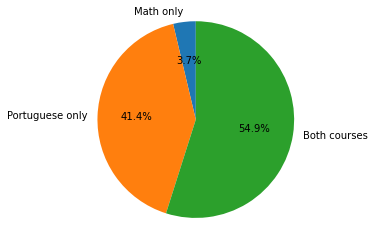

In [863]:
import matplotlib.pyplot as plt

labels = 'Math only', 'Portuguese only', 'Both courses'
sizes = [only_math_records_len, only_potuguese_records_len, both_records_len]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()

### Náhled sloučeného datasetu před úpravami

In [864]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures_math,schoolsup,famsup,paid_math,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences_math,G1_math,G2_math,G3_math,failures_portuguese,paid_portuguese,absences_portuguese,G1_portuguese,G2_portuguese,G3_portuguese
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0.0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6.0,5.0,6.0,6.0,0.0,no,4.0,0.0,11.0,11.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0.0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4.0,5.0,5.0,6.0,0.0,no,2.0,9.0,11.0,11.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3.0,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10.0,7.0,8.0,10.0,0.0,no,6.0,12.0,13.0,12.0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0.0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2.0,15.0,14.0,15.0,0.0,no,0.0,14.0,14.0,14.0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0.0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4.0,6.0,10.0,10.0,0.0,no,0.0,11.0,13.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,MS,F,19,R,GT3,A,1,1,at_home,at_home,course,other,2,2,NaN,no,yes,NaN,yes,yes,no,no,yes,3,5,4,1,4,1,NaN,NaN,NaN,NaN,3.0,no,0.0,8.0,0.0,0.0
670,MS,F,18,R,GT3,T,2,2,services,other,home,mother,2,3,NaN,no,no,NaN,no,yes,yes,yes,yes,4,2,1,1,1,4,NaN,NaN,NaN,NaN,0.0,no,5.0,14.0,14.0,15.0
671,MS,F,18,R,LE3,A,1,2,at_home,other,course,mother,3,2,NaN,no,no,NaN,no,yes,yes,no,yes,4,3,4,1,4,5,NaN,NaN,NaN,NaN,0.0,no,0.0,16.0,15.0,15.0
672,MS,F,19,R,GT3,T,1,1,at_home,other,course,other,2,2,NaN,no,yes,NaN,no,yes,yes,yes,yes,4,3,3,1,1,3,NaN,NaN,NaN,NaN,1.0,no,4.0,7.0,8.0,9.0


## Preprocessing dat

### Přidání atributu `id`

Pro usnadnění práce a prevence chyb byl přidán inkrementální identifikační atribut `id`.

In [865]:
data['id'] = data.index

print('Data:')
print(data.count())

Data:
school                 674
sex                    674
age                    674
address                674
famsize                674
Pstatus                674
Medu                   674
Fedu                   674
Mjob                   674
Fjob                   674
reason                 674
guardian               674
traveltime             674
studytime              674
failures_math          395
schoolsup              674
famsup                 674
paid_math              395
activities             674
nursery                674
higher                 674
internet               674
romantic               674
famrel                 674
freetime               674
goout                  674
Dalc                   674
Walc                   674
health                 674
absences_math          395
G1_math                395
G2_math                395
G3_math                395
failures_portuguese    649
paid_portuguese        649
absences_portuguese    649
G1_portuguese         

### Výtvoření subsetů
Pro předzpracování dat je vhodné data rozdělit do skupin podle předmětů.

#### Všichni studenti matematiky

In [866]:
data_math = data[data['G1_math'].notnull()]
                 
print(f'Math students: {data_math.shape[0]}')

Math students: 395


#### Všichni studenti portugalštiny

In [867]:
data_portuguese = data[data['G1_portuguese'].notnull()]

print(f'Portuguese students: {data_portuguese.shape[0]}')

Portuguese students: 649


#### Studentni obou předmětů

In [868]:
data_both = data_math.merge(data_portuguese)

print(f'Students with both classes: {data_both.shape[0]}')

Students with both classes: 370


#### Studenti pouze matematiky

In [869]:
data_math_only = data[~data.id.isin(data_portuguese.id)]

print(f'Math only students: {data_math_only.shape[0]}')

Math only students: 25


#### Studenti pouze portugalštiny

In [870]:
data_portuguese_only = data[~data.id.isin(data_math.id)]

print(f'Portuguese only students: {data_portuguese_only.shape[0]}')

Portuguese only students: 279


### Ošetření chybějících hodnot
V původních rozdělených datasetech se nevyskytují chybějící hodnoty. Sloučením datasetů však vznikly případy s chybějícími hodnotami u studentů, kteří mají buď pouze matematiku, nebo pouze protugalštinu. K tomuto problému dochází u atributů pro konkrétní předmět.

Studenti pouze v matematice
- failures_portuguese
- paid_portuguese
- absences_portuguese
- G1_portuguese
- G2_portuguese
- G3_portuguese

Studenti pouze v portugalštině
- failures_math
- paid_math
- absences_math
- G1_math
- G2_math
- G3_math

#### Atribut `failures_`
Atribut `failures_` je numerický atribut nabývající hodnot v intervalu `<0,3>`. Znázorňuje, kolikrát student nezvládl daný předmět v minulosti absolvovat. Chybějící hodnoty budou nastaveny na `0`.

In [871]:
data.loc[data_math_only.id, 'failures_portuguese'] = 0
data.loc[data_portuguese_only.id, 'failures_math'] = 0

print('Sample of math only students:')
print(data.loc[data_math_only.id, ['failures_portuguese']].head(n=5))

print('\nSample of portuguese only students:')
print(data.loc[data_portuguese_only.id, ['failures_math']].head(n=5))

Sample of math only students:
     failures_portuguese
128                  0.0
161                  0.0
162                  0.0
163                  0.0
165                  0.0

Sample of portuguese only students:
     failures_math
395            0.0
396            0.0
397            0.0
398            0.0
399            0.0


#### Atribut `paid_`
Atribut `paid` je binární atribut s hodnotami `yes` a `no`. Znázorňuje, zdali si student zaplatil za dodatečné lekce k danému předmětu. Pro studenta pouze jednoho předmětu bude tento atribut k druhému předmětu vždy `no`.

In [872]:
data.loc[data_math_only.id, 'paid_portuguese'] = 'no'
data.loc[data_portuguese_only.id, 'paid_math'] = 'no'

print('Sample of math only students:')
print(data.loc[data_math_only.id, ['paid_portuguese']].head(n=5))

print('\nSAmple of portuguese only students:')
print(data.loc[data_portuguese_only.id, ['paid_math']].head(n=5))

Sample of math only students:
    paid_portuguese
128              no
161              no
162              no
163              no
165              no

SAmple of portuguese only students:
    paid_math
395        no
396        no
397        no
398        no
399        no


#### Atribut `absences_`
Atribut `absences_` je numerický atribut nabývající hodnot v intervalu `<0,93>`. Znázorňuje, kolikrát student byl nepřítomen v daném předmětu. Chybějící hodnoty budou nastaveny na `0`.

In [873]:
data.loc[data_math_only.id, 'absences_portuguese'] = 0
data.loc[data_portuguese_only.id, 'absences_math'] = 0

print('Sample of math only students:')
print(data.loc[data_math_only.id, ['absences_portuguese']].head(n=5))

print('\nSample of portuguese only students:')
print(data.loc[data_portuguese_only.id, ['absences_math']].head(n=5))

Sample of math only students:
     absences_portuguese
128                  0.0
161                  0.0
162                  0.0
163                  0.0
165                  0.0

Sample of portuguese only students:
     absences_math
395            0.0
396            0.0
397            0.0
398            0.0
399            0.0


#### Atributy hodnocení  `G*_`
Atributy `G*_` jsou numerické atributy nabývající hodnot v intervalu `<0,20>`. Znázorňují hodnocení studentů. Chybějící hodnoty budou nastaveny na `0`.

In [874]:
data.loc[data_math_only.id, ['G1_portuguese', 'G2_portuguese', 'G3_portuguese']] = 0
data.loc[data_portuguese_only.id, ['G1_math', 'G2_math', 'G3_math']] = 0

print('Sample of math only students:')
print(data.loc[data_math_only.id, ['G1_portuguese', 'G2_portuguese', 'G3_portuguese']].head(n=5))

print('\nSample of portuguese only students:')
print(data.loc[data_portuguese_only.id, ['G1_math', 'G2_math', 'G3_math']].head(n=5))

Sample of math only students:
     G1_portuguese  G2_portuguese  G3_portuguese
128            0.0            0.0            0.0
161            0.0            0.0            0.0
162            0.0            0.0            0.0
163            0.0            0.0            0.0
165            0.0            0.0            0.0

Sample of portuguese only students:
     G1_math  G2_math  G3_math
395      0.0      0.0      0.0
396      0.0      0.0      0.0
397      0.0      0.0      0.0
398      0.0      0.0      0.0
399      0.0      0.0      0.0


#### Kontrola chybějících hodnot
Nyní mají všechny sloupce 674 záznamů.

In [875]:
print(f'All data: {len(data)}')

print('\nData count:')
print(data.count())

All data: 674

Data count:
school                 674
sex                    674
age                    674
address                674
famsize                674
Pstatus                674
Medu                   674
Fedu                   674
Mjob                   674
Fjob                   674
reason                 674
guardian               674
traveltime             674
studytime              674
failures_math          674
schoolsup              674
famsup                 674
paid_math              674
activities             674
nursery                674
higher                 674
internet               674
romantic               674
famrel                 674
freetime               674
goout                  674
Dalc                   674
Walc                   674
health                 674
absences_math          674
G1_math                674
G2_math                674
G3_math                674
failures_portuguese    674
paid_portuguese        674
absences_portuguese    674
G

### Upravení typů sloupců
Typy některých sloupců byly při sloučení DataFramů změněny. Děje se tak v případě rozdělených atributů se suffixy `_math` a `_portuguese`, protože sloučením vznikly chybějící hodnoty a typ těchto atributů byl v případě `int` změněn na `float`. Sloupce je po ošetření chybějících hodnot vhodné opět přetypovat na `int`.

In [876]:
columns_to_retype = [
    'failures_math',
    'absences_math',
    'G1_math',
    'G2_math',
    'G3_math',
    'failures_portuguese',
    'absences_portuguese',
    'G1_portuguese',
    'G2_portuguese',
    'G3_portuguese'
]

data[columns_to_retype] = data[columns_to_retype].astype(int)

data.dtypes

school                 object
sex                    object
age                     int64
address                object
famsize                object
Pstatus                object
Medu                    int64
Fedu                    int64
Mjob                   object
Fjob                   object
reason                 object
guardian               object
traveltime              int64
studytime               int64
failures_math           int64
schoolsup              object
famsup                 object
paid_math              object
activities             object
nursery                object
higher                 object
internet               object
romantic               object
famrel                  int64
freetime                int64
goout                   int64
Dalc                    int64
Walc                    int64
health                  int64
absences_math           int64
G1_math                 int64
G2_math                 int64
G3_math                 int64
failures_p

### Vytvoření odvozených atributů

#### Atribut `course`
Atribut `course` zařazuje studenty do skupin podle předmětů. Jedná se o nominální atribut nabývající hodnot:
- `M` pouze matematika
- `P` pouze portugalština
- `MP` oba předměty

In [877]:
data.loc[data_math_only.id, 'course'] = 'M'
data.loc[data_portuguese_only.id, 'course'] = 'P'
data.loc[data_both.id, 'course'] = 'MP'

print('Sample of math only students:')
print(data.loc[data_math_only.id, ['course']].sample(n=5))

print('\nSample of portuguese only students:')
print(data.loc[data_portuguese_only.id, ['course']].sample(n=5))

print('\nSample of students with both courses:')
print(data.loc[data_both.id, ['course']].sample(n=5))

print('\nPossible values:')
print(data.course.unique())

Sample of math only students:
    course
360      M
310      M
314      M
390      M
309      M

Sample of portuguese only students:
    course
507      P
489      P
468      P
605      P
614      P

Sample of students with both courses:
    course
28      MP
89      MP
178     MP
60      MP
69      MP

Possible values:
['MP' 'M' 'P']


#### Atribut `semester_M` a `semester_P`
Atribut `semester_M` a `semester_P` popisuje, kolik bodů z průběžných tesů v rámci kurzů matematiky nebo portugalštiny student získal. Byl vypočten součtem bodů z obou testů.

In [878]:
data['semester_M'] = data['G1_math'] + data['G2_math']
data['semester_P'] = data['G1_portuguese'] + data['G2_portuguese']

print('\nSample of students with both courses:')
print(data.loc[data_both.id, ['semester_M', 'semester_P']].sample(n=15))


Sample of students with both courses:
     semester_M  semester_P
63           19          27
13           20          24
169          28          32
59           31          31
209          14          23
216          12          20
182          33          35
90           14          20
11           22          22
194          27          25
133          23          28
230          26          26
98           25          25
295          26          29
362          22          25


#### Atribut `finish_both`
V posledním kroku byl vytvořen atribut `finish_both`, který popisuje, zda student úspěšně dokončil oba kurzy matematiky a portugalštiny.

In [879]:
data['finish_both'] = (data['G3_math'] >= 12) & (data['G3_portuguese'] >= 12)
data['finish_both'] = data['finish_both'].replace({False:'no', True:'yes'})

print('\nSample of students with both courses:')
print(data.loc[data_both.id, ['finish_both']].sample(n=15))


Sample of students with both courses:
    finish_both
139         yes
94          yes
48          yes
105          no
316          no
21          yes
160          no
33          yes
17           no
84           no
96           no
127          no
189          no
267          no
4            no


### Náhled na data před úpravou na strojově čitelné hodnoty

In [880]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures_math,schoolsup,famsup,paid_math,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences_math,G1_math,G2_math,G3_math,failures_portuguese,paid_portuguese,absences_portuguese,G1_portuguese,G2_portuguese,G3_portuguese,id,course,semester_M,semester_P,finish_both
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,no,4,0,11,11,0,MP,11,11,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0,no,2,9,11,11,1,MP,10,20,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,no,6,12,13,12,2,MP,15,25,no
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,no,0,14,14,14,3,MP,29,28,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,no,0,11,13,13,4,MP,16,24,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,MS,F,19,R,GT3,A,1,1,at_home,at_home,course,other,2,2,0,no,yes,no,yes,yes,no,no,yes,3,5,4,1,4,1,0,0,0,0,3,no,0,8,0,0,669,P,0,8,no
670,MS,F,18,R,GT3,T,2,2,services,other,home,mother,2,3,0,no,no,no,no,yes,yes,yes,yes,4,2,1,1,1,4,0,0,0,0,0,no,5,14,14,15,670,P,0,28,no
671,MS,F,18,R,LE3,A,1,2,at_home,other,course,mother,3,2,0,no,no,no,no,yes,yes,no,yes,4,3,4,1,4,5,0,0,0,0,0,no,0,16,15,15,671,P,0,31,no
672,MS,F,19,R,GT3,T,1,1,at_home,other,course,other,2,2,0,no,yes,no,no,yes,yes,yes,yes,4,3,3,1,1,3,0,0,0,0,1,no,4,7,8,9,672,P,0,15,no


### Předělání atributů do strojově čitelné podoby

#### Zkopírování datasetu
Byla vytvořena kopie datasetu určená pro data science

In [881]:
data_processed = data.copy()

#### Binární atributy s hodnotami `yes` a `no`
Binární sloupce nabyvající hodnot `yes` a `no` byly předělány strojově čitelnými hodnotami:
- `0` pro `no`
- `1` pro `yes`

In [882]:
binary_columns = [
    'schoolsup',
    'famsup',
    'paid_math',
    'activities',
    'nursery',
    'higher',
    'internet',
    'romantic',
    'paid_portuguese',
    'finish_both'
]

data_processed[binary_columns] = data_processed[binary_columns].replace({'no':0, 'yes':1})

#### Atribut `school`
Nominální atribut `school` nabývá hodnot `GP` pro školu `Gabriel Pereira` a `MS` pro `Mousinho da Silveira`. Atributy byly nahrazeny následovně:
- `0` pro `GP`
- `1` pro `MS`

In [883]:
print(f'Possible values: {data_processed.school.unique()}')

data_processed['school'] = data_processed['school'].replace({'GP':0, 'MS':1})

print(f'Changed to values: {data_processed.school.unique()}')

Possible values: ['GP' 'MS']
Changed to values: [0 1]


#### Atribut `sex`
Nominální atribut `sex` nabývá hodnot `F` pro pohlaví `female` a `M` pro `male`. Atributy byly nahrazeny následovně:
- `0` pro `F`
- `1` pro `M`

In [884]:
print(f'Possible values: {data_processed.sex.unique()}')

data_processed['sex'] = data_processed['sex'].replace({'F':0, 'M':1})

print(f'Changed to values: {data_processed.sex.unique()}')

Possible values: ['F' 'M']
Changed to values: [0 1]


#### Atribut `address`
Nominální atribut `address` nabývá hodnot `U` pro typ bydliště `urban` a `R` pro `rural`. Atributy byly nahrazeny následovně:
- `0` pro `U`
- `1` pro `R`

In [885]:
print(f'Possible values: {data_processed.address.unique()}')

data_processed['address'] = data_processed['address'].replace({'U':0, 'R':1})

print(f'Changed to values: {data_processed.address.unique()}')

Possible values: ['U' 'R']
Changed to values: [0 1]


#### Atribut `famsize`
Nominální atribut `famsize` nabývá hodnot `GT3` pro velikost rodiny `greter than 3` a `LE3` pro `less or equal to 3`. Atributy byly nahrazeny následovně:
- `0` pro `GT3`
- `1` pro `LE3`

In [886]:
print(f'Possible values: {data_processed.famsize.unique()}')

data_processed['famsize'] = data_processed['famsize'].replace({'GT3':0, 'LE3':1})

print(f'Changed to values: {data_processed.famsize.unique()}')

Possible values: ['GT3' 'LE3']
Changed to values: [0 1]


#### Atribut `Pstatus`
Nominální atribut `Pstatus` nabývá hodnot `A` pro soužití rodiču `apart` a `T` pro `living together`. Atributy byly nahrazeny následovně:
- `0` pro `A`
- `1` pro `T`

In [887]:
print(f'Possible values: {data_processed.Pstatus.unique()}')

data_processed['Pstatus'] = data_processed['Pstatus'].replace({'A':0, 'T':1})

print(f'Changed to values: {data_processed.Pstatus.unique()}')

Possible values: ['A' 'T']
Changed to values: [0 1]


#### Atributy `Mjob` a `Fjob`
Nominální atributy `Mjob` a `Fjob` nabývají hodnot druhu zaměstnání `at_home`, `health`, `other`, `services`, `teacher` pro konkrétního rodiče. Atributy byly nahrazeny následovně:
- `0` pro `at_home`
- `1` pro `health`
- `2` pro `other`
- `3` pro `services`
- `4` pro `teacher`

In [888]:
print(f'Possible Mjob values: {data_processed.Mjob.unique()}')
print(f'Possible Fjob values: {data_processed.Fjob.unique()}')

enum = {
    'at_home':0,
    'health':1,
    'other':2,
    'services':3,
    'teacher':4
}

data_processed[['Mjob', 'Fjob']] = data_processed[['Mjob', 'Fjob']].replace(enum)

print(f'\nMjob changed to values: {data_processed.Mjob.unique()}')
print(f'Fjob changed to values: {data_processed.Fjob.unique()}')

Possible Mjob values: ['at_home' 'health' 'other' 'services' 'teacher']
Possible Fjob values: ['teacher' 'other' 'services' 'health' 'at_home']

Mjob changed to values: [0 1 2 3 4]
Fjob changed to values: [4 2 3 1 0]


#### Atribut `reason`
Nominální atribut `reason` nabývá hodnot pro výběr školy `course`, `other`, `home`, `reputation`. Atributy byly nahrazeny následovně:
- `0` pro `course`
- `1` pro `other`
- `2` pro `home`
- `3` pro `reputation`

In [889]:
print(f'Possible values: {data_processed.reason.unique()}')

enum = {
    'course':0,
    'other':1,
    'home':2,
    'reputation':3
}

data_processed['reason'] = data_processed['reason'].replace(enum)

print(f'Changed to values: {data_processed.reason.unique()}')

Possible values: ['course' 'other' 'home' 'reputation']
Changed to values: [0 1 2 3]


#### Atribut `guardian`
Nominální atribut `guardian` nabývá hodnot pro opatrovníka `mother`, `father`, `other`. Atributy byly nahrazeny následovně:
- `0` pro `mother`
- `1` pro `father`
- `2` pro `other`

In [890]:
print(f'Possible values: {data_processed.guardian.unique()}')

data_processed['guardian'] = data_processed['guardian'].replace({'mother':0, 'father':1, 'other':2})

print(f'Changed to values: {data_processed.guardian.unique()}')

Possible values: ['mother' 'father' 'other']
Changed to values: [0 1 2]


#### Atribut `course`
Nominální atribut `course` nabývá hodnot `M` pro matematiku, `P` pro portugalštinu a `MP` pro oba předměty. Atributy byly nahrazeny následovně:
- `0` pro `M`
- `1` pro `P`
- `2` pro `MP`

In [891]:
print(f'Possible values: {data_processed.course.unique()}')

data_processed['course'] = data_processed['course'].replace({'M':0, 'P':1, 'MP':2})

print(f'Changed to values: {data_processed.course.unique()}')

Possible values: ['MP' 'M' 'P']
Changed to values: [2 0 1]


### Náhled na připravená data

In [892]:
data_processed

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures_math,schoolsup,famsup,paid_math,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences_math,G1_math,G2_math,G3_math,failures_portuguese,paid_portuguese,absences_portuguese,G1_portuguese,G2_portuguese,G3_portuguese,id,course,semester_M,semester_P,finish_both
0,0,0,18,0,0,0,4,4,0,4,0,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,0,0,4,0,11,11,0,2,11,11,0
1,0,0,17,0,0,1,1,1,0,2,0,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,0,0,2,9,11,11,1,2,10,20,0
2,0,0,15,0,1,1,1,1,0,2,1,0,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,0,0,6,12,13,12,2,2,15,25,0
3,0,0,15,0,0,1,4,2,1,3,2,0,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,0,0,0,14,14,14,3,2,29,28,1
4,0,0,16,0,0,1,3,3,2,2,2,1,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,0,0,0,11,13,13,4,2,16,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,1,0,19,1,0,0,1,1,0,0,0,2,2,2,0,0,1,0,1,1,0,0,1,3,5,4,1,4,1,0,0,0,0,3,0,0,8,0,0,669,1,0,8,0
670,1,0,18,1,0,1,2,2,3,2,2,0,2,3,0,0,0,0,0,1,1,1,1,4,2,1,1,1,4,0,0,0,0,0,0,5,14,14,15,670,1,0,28,0
671,1,0,18,1,1,0,1,2,0,2,0,0,3,2,0,0,0,0,0,1,1,0,1,4,3,4,1,4,5,0,0,0,0,0,0,0,16,15,15,671,1,0,31,0
672,1,0,19,1,0,1,1,1,0,2,0,2,2,2,0,0,1,0,0,1,1,1,1,4,3,3,1,1,3,0,0,0,0,1,0,4,7,8,9,672,1,0,15,0


## Příprava dat pro modely

Pro samotnou predikci byl vytvořen nový dataset data_model, byli odfiltrováni studenti, kteří měli pouze jeden z kurzů, jelikož by hodnoty jejich atributů zkreslovaly výsledek.

In [893]:
data_model = data_processed.copy()
data_model = data_model.loc[data_both.id]
data_model

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures_math,schoolsup,famsup,paid_math,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences_math,G1_math,G2_math,G3_math,failures_portuguese,paid_portuguese,absences_portuguese,G1_portuguese,G2_portuguese,G3_portuguese,id,course,semester_M,semester_P,finish_both
0,0,0,18,0,0,0,4,4,0,4,0,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,0,0,4,0,11,11,0,2,11,11,0
1,0,0,17,0,0,1,1,1,0,2,0,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,0,0,2,9,11,11,1,2,10,20,0
2,0,0,15,0,1,1,1,1,0,2,1,0,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,0,0,6,12,13,12,2,2,15,25,0
3,0,0,15,0,0,1,4,2,1,3,2,0,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,0,0,0,14,14,14,3,2,29,28,1
4,0,0,16,0,0,1,3,3,2,2,2,1,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,0,0,0,11,13,13,4,2,16,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,1,0,19,1,0,1,2,3,3,2,0,0,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,0,7,5,0,1,0,4,10,11,10,387,2,12,21,0
388,1,0,18,0,1,1,3,1,4,3,0,0,1,2,0,0,1,1,0,1,1,1,0,4,3,4,1,1,1,0,7,9,8,0,0,4,15,15,16,388,2,16,30,0
389,1,0,18,0,0,1,1,1,2,2,0,0,2,2,1,0,0,0,1,1,1,0,0,1,1,1,1,1,5,0,6,5,0,0,0,6,11,12,9,389,2,11,23,0
391,1,1,17,0,1,1,3,1,3,3,0,0,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,14,16,16,0,0,6,10,10,10,391,2,30,20,0


## Stavba modelu

Prvně byly určeny atributy, které budou dále použity ke klasifikaci, jedná se o následující - pohlaví, věk, dokončené vzdělání a povolání obou rodičů, důvod výběru školy a atributy týkající sociální života studenta - zda má partnera, kolik času tráví s vrstevníky, kolik alkoholu konzumuje ve všední dny a kolik alkoholu konzumuje o víkendu. V neposledné řadě byly pochopitelně zahrnuty oba vytvořené atributy popisující bodový zisk ze semestru v rámci kurzu. Jako cílová proměnná byl zvolen atribut `finish_both`, tedy zda student úspěšně dokončil oba kurzy.

In [894]:
features = [
    'sex',
    'age',
    'Medu',
    'Fedu',
    'Mjob',
    'Fjob',
    'reason',
    'goout',
    'Dalc',
    'Walc',
    'semester_M',
    'semester_P'
]

In [895]:
import numpy as np

X = np.asarray(data_model[features])
y = np.asarray(data_model['finish_both'])

### Train_test_split

Dále byl proveden train_test_split datasetu, na testování bylo použito 25% dat.

In [896]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

#check train and test set dimensions
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (259, 12) (259,)
Test set: (111, 12) (111,)


### Random Forest

Prvním použitým algoritmem byl Random Forest.

In [897]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [898]:
random_forest = RandomForestClassifier(n_estimators=20, max_depth=10, min_samples_split=2, min_samples_leaf=5,
                                       max_leaf_nodes=20, max_features=len(features)) 

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
y_prob = random_forest.predict_proba(X_test)[:,1]

feat_importance = random_forest.feature_importances_
rffeat_importance = pd.DataFrame([features, random_forest.feature_importances_]).T

print('***Random forest classifier***')
print('\nAccuracy on training data:', random_forest.score(X_train, y_train))
print('Accuracy on test data:', random_forest.score(X_test, y_test))
print('\nConfusion matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification report for Random forest:\n', classification_report(y_test, y_pred))
print(rffeat_importance.sort_values(by=1, ascending=False))

***Random forest classifier***

Accuracy on training data: 0.9613899613899614
Accuracy on test data: 0.918918918918919

Confusion matrix:
 [[72  6]
 [ 3 30]]

Classification report for Random forest:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        78
           1       0.83      0.91      0.87        33

    accuracy                           0.92       111
   macro avg       0.90      0.92      0.91       111
weighted avg       0.92      0.92      0.92       111

             0            1
10  semester_M     0.758885
11  semester_P     0.198207
6       reason    0.0186054
9         Walc    0.0111229
4         Mjob   0.00412325
3         Fedu   0.00260046
8         Dalc   0.00231186
1          age   0.00187736
5         Fjob    0.0013821
7        goout  0.000823868
2         Medu  6.06973e-05
0          sex            0


#### ROC křivka

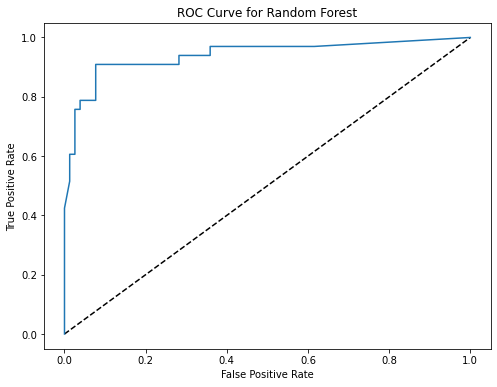

In [899]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.show()

### Logistic Regression

In [900]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report


logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)

y_pred = logreg.predict(X_test)

y_prob = logreg.predict_proba(X_test)[:,1]


print('Precision, Recall, F-score, Support:\n', precision_recall_fscore_support(y_test, y_pred, average='weighted'))

cm = confusion_matrix(y_test, y_pred)
print('\nConfusion matrix: \n', cm)

print('\nClassification report for Logistic Regression:\n', classification_report(y_test, y_pred))

Precision, Recall, F-score, Support:
 (0.8588295061979274, 0.8558558558558559, 0.8570396217455041, None)

Confusion matrix: 
 [[69  9]
 [ 7 26]]

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90        78
           1       0.74      0.79      0.76        33

    accuracy                           0.86       111
   macro avg       0.83      0.84      0.83       111
weighted avg       0.86      0.86      0.86       111



#### ROC křivka

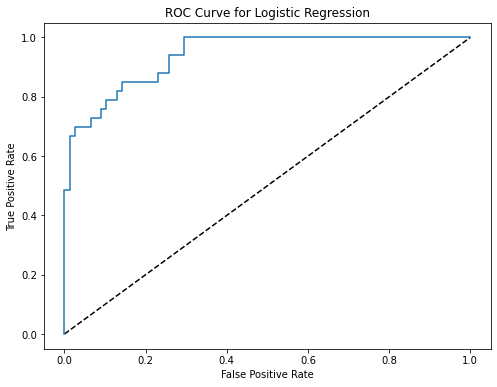

In [901]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.show()

### Metaparameter tuning

Vzhledem k tomu, že model Random Forest dosáhl velmi dobrého výsledku, bylo nastavení metaparametrů provedeno pouze pro model Logistic Regression, abychom zde výsledky zlepšili.

Pro nastavení metaparametrů byl použit GridSearchCV pro parametry `C` a `penalty`. Předtím byl dataset rozdělen na training set a hold-out set (35% dat).

In [902]:
from sklearn.model_selection import GridSearchCV

c_values = np.logspace(-5, 8, 15)
max_iter_values = [200, 300, 500]
param_grid = {'C': c_values, 'max_iter': max_iter_values}


X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X, y, test_size = 0.4, random_state = 42)
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train_cv, y_train_cv)

print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.05179474679231213, 'max_iter': 200}
Tuned Logistic Regression Accuracy: 0.9097979797979798


Pomocí nastavení metaparametrů na hodnoty výše došlo ke zvýšení přesnosti na 90,9%.

## Závěr